In [1]:
import pandas as pd
import os
import numpy as np
from math import floor

from termcolor import colored as cl
import matplotlib.pyplot as plt

In [2]:
current_dir = os.getcwd()
print(current_dir)
parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir))

C:\Users\I933927\Documents\capstone


## Content of this notebook

### 1. [Data Collection](#data_collection)
download data from yahoo finance ^HSI and ^DJI

separate data into groups for each DJI/HSI
* 2008 - 2010
* 2011 - 2013
* 2014 - 2016
* 2017 - 2019
* 2020 - 2022

### 2. [Step by step calculation MA / MACD](#step_by_step)


#### 2a. [MA functions](#ma_functions)
* def get_ma(price, slow, fast): -> 
* def plot_ma(prices, ma1, ma2, hist): ->
* def implement_ma_strategy(prices, data): -> 


#### 2b. [MACD functions](#macd_functions)
* def get_macd(price, slow, fast, smooth): -> 
* def plot_macd(prices, macd, signal, hist): ->
* def implement_macd_strategy(prices, data): ->

### 3. [Test running MACD functions](#test_macd)
* get MACD
* plot MACD and signal
* calculate price and signal
* plot MACD and signal with buy sell 
* find position strategy
* calculate returns

### 4. [All in one Functions](#all_in_one)

#### 4a. [MA all in one Functions](#ma_all_functions)
* def calculate_ma_strategy(df, slow, fast): -> return dataframe that provides "daily" data with buy/sell positions and returns
* def calculate_ma_return(df, slow, fast, investment_value): 

#### 4b. [MACD all in one Functions](#macd_all_functions)
* def calculate_macd_strategy(df, slow, fast, smooth): 
* def calculate_macd_return(df, slow, fast, smooth, investment_value): 

reference: https://medium.com/codex/algorithmic-trading-with-macd-in-python-1c2769a6ad1b
usually -> [= short (fast) 12 - long (slow) 26]

### 5. [find model Parameters that produce best win rate and return](#find_parameters)

#### 5a. Use max 30 fast / slow, try all combination, with the top 5 winrate models, pick the one with the highest return, apply to the test data set. 
1. [HSI MA](#5a1_HSI_MA)
2. [HSI MACD](#5a2_HSI_MACD)
3. [DJIA MA](#5a3_DJIA_MA)
4. [DJIA MACD](#5a4_DJIA_MACD)

#### 5b. Use max 60 fast / slow, try all combination, with the top 5 winrate models, pick the one with the highest return, apply to the test data set. 
1. [HSI MA](#5b1_HSI_MA)
2. [HSI MACD](#5b2_HSI_MACD)
3. [DJIA MA](#5b3_DJIA_MA)
4. [DJIA MACD](#5b4_DJIA_MACD)





## Statement to check

### Using more historical data to pick parameter can yield high return to our control. 
* No. We use historical data to pick the parameters of the models. The return is about the same as using the fixed parameters 12 / 26 of MACD. 

### Higher parameter numbers (longer periods) can yield higher return in general. 
* No. Using higher parameter numbers doesn't yield higher return for DJIA on both MA and MACD model. 

### MACD can yield higher return than MA model. 
* Yes. The MACD outperform the MA model. It has 2x return %. 

    - HSI MA best models -> 3% return (average of 8 [models/time periods])
    - HSI MACD best models -> 6% return 

    - DJIA MA best models -> 7% return 
    - DJIA MACD best models -> 19% return 


### Models work better on DJIA than HSI. 
* Yes. The models work better on the DJIA index. The return is much higher using the models on DJIA. 


<a id='data_collection'></a>
## 1. Data Collection
### 1a. HSI Data

In [3]:
import yfinance as yf

HSI_df=yf.download('^HSI', start='2008-01-01', end='2022-12-31')

HSI_df_A_train = HSI_df.loc['2008-01-01':'2010-12-31']
HSI_df_A_test = HSI_df.loc['2011-01-01':'2013-12-31']
HSI_df_B_train = HSI_df.loc['2008-01-01':'2013-12-31']
HSI_df_B_test = HSI_df.loc['2014-01-01':'2016-12-31']
HSI_df_C_train = HSI_df.loc['2008-01-01':'2016-12-31']
HSI_df_C_test = HSI_df.loc['2017-01-01':'2019-12-31']
HSI_df_D_train = HSI_df.loc['2008-01-01':'2019-12-31']
HSI_df_D_test = HSI_df.loc['2020-01-01':'2022-12-31']

HSI_df_test = HSI_df.loc['2022-10-01':'2022-12-31']

[*********************100%***********************]  1 of 1 completed


In [4]:
HSI_df_test.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-03 00:00:00+08:00,17050.250000,17252.109375,16906.960938,17079.509766,17079.509766,1361001600
2022-10-05 00:00:00+08:00,17811.970703,18164.199219,17682.849609,18087.970703,18087.970703,2256107700
2022-10-06 00:00:00+08:00,18100.480469,18143.849609,17958.140625,18012.150391,18012.150391,1082368000
2022-10-07 00:00:00+08:00,17851.619141,17881.869141,17717.730469,17740.050781,17740.050781,1129251000
2022-10-10 00:00:00+08:00,17449.359375,17449.359375,17174.609375,17216.660156,17216.660156,1771824300


### 1b. DJIA Data

In [5]:
DJIA_df=yf.download('^DJI', start='2008-01-01', end='2022-12-31')

DJIA_df_A_train = DJIA_df.loc['2008-01-01':'2010-12-31']
DJIA_df_A_test = DJIA_df.loc['2011-01-01':'2013-12-31']
DJIA_df_B_train = DJIA_df.loc['2008-01-01':'2013-12-31']
DJIA_df_B_test = DJIA_df.loc['2014-01-01':'2016-12-31']
DJIA_df_C_train = DJIA_df.loc['2008-01-01':'2016-12-31']
DJIA_df_C_test = DJIA_df.loc['2017-01-01':'2019-12-31']
DJIA_df_D_train = DJIA_df.loc['2008-01-01':'2019-12-31']
DJIA_df_D_test = DJIA_df.loc['2020-01-01':'2022-12-31']

DJIA_df_test = DJIA_df.loc['2022-10-01':'2022-12-31']

[*********************100%***********************]  1 of 1 completed


<a id='step_by_step'></a>
## 2. Step by step calculation MA / MACD

<a id='ma_functions'></a>
### 2a. MA step by step Functions

In [6]:
def get_ma(price, slow, fast): 
    ma1 = pd.DataFrame(price.rolling(fast).mean()).rename(columns = {'Close':'ma1'})
    ma2 = pd.DataFrame(price.rolling(slow).mean()).rename(columns = {'Close':'ma2'})
    hist = pd.DataFrame(ma1['ma1'] - ma2['ma2']).rename(columns = {0:'hist'})
    frames =  [ma1, ma2, hist]
    df = pd.concat(frames, join = 'inner', axis = 1)
    return df

In [7]:
def plot_ma(prices, ma1, ma2, hist):
    ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan = 1)
    ax2 = plt.subplot2grid((8,1), (5,0), rowspan = 3, colspan = 1)

    ax1.plot(prices)
    ax2.plot(ma1, color = 'grey', linewidth = 1.5, label = 'ma1')
    ax2.plot(ma2, color = 'skyblue', linewidth = 1.5, label = 'ma2')

    for i in range(len(prices)):
        if str(hist[i])[0] == '-':
            ax2.bar(prices.index[i], hist[i], color = '#ef5350')
        else:
            ax2.bar(prices.index[i], hist[i], color = '#26a69a')

    plt.legend(loc = 'lower right')

In [8]:
def implement_ma_strategy(prices, data):
    buy_price = []
    sell_price = []
    ma_signal = []
    signal = 0

    for i in range(len(data)):
        if data['ma1'][i] > data['ma2'][i]:
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                ma_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                ma_signal.append(0)
        elif data['ma1'][i] < data['ma2'][i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                ma_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                ma_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            ma_signal.append(0)
            
    return buy_price, sell_price, ma_signal

<a id='macd_functions'></a>
### 2b. MACD step by step Functions

In [9]:
def get_macd(price, slow, fast, smooth):
    exp1 = price.ewm(span = fast, adjust = False).mean()
    exp2 = price.ewm(span = slow, adjust = False).mean()
    macd = pd.DataFrame(exp1 - exp2).rename(columns = {'Close':'macd'})
    signal = pd.DataFrame(macd.ewm(span = smooth, adjust = False).mean()).rename(columns = {'macd':'signal'})
    hist = pd.DataFrame(macd['macd'] - signal['signal']).rename(columns = {0:'hist'})
    frames =  [macd, signal, hist]
    df = pd.concat(frames, join = 'inner', axis = 1)
    return df

In [10]:
def plot_macd(prices, macd, signal, hist):
    ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan = 1)
    ax2 = plt.subplot2grid((8,1), (5,0), rowspan = 3, colspan = 1)

    ax1.plot(prices)
    ax2.plot(macd, color = 'grey', linewidth = 1.5, label = 'MACD')
    ax2.plot(signal, color = 'skyblue', linewidth = 1.5, label = 'SIGNAL')

    for i in range(len(prices)):
        if str(hist[i])[0] == '-':
            ax2.bar(prices.index[i], hist[i], color = '#ef5350')
        else:
            ax2.bar(prices.index[i], hist[i], color = '#26a69a')

    plt.legend(loc = 'lower right')

In [11]:
def implement_macd_strategy(prices, data):
    buy_price = []
    sell_price = []
    macd_signal = []
    signal = 0

    for i in range(len(data)):
        if data['macd'][i] > data['signal'][i]:
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                macd_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                macd_signal.append(0)
        elif data['macd'][i] < data['signal'][i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                macd_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                macd_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            macd_signal.append(0)
            
    return buy_price, sell_price, macd_signal

<a id='test_macd'></a>
### 3. Test running MACD functions 

In [12]:
djia_macd = get_macd(HSI_df_test['Close'], 26, 12, 9)
djia_macd.tail()

,macd,signal,hist
Date,,,
2022-12-22 00:00:00+08:00,515.627667,587.603672,-71.976005
2022-12-23 00:00:00+08:00,502.902837,570.663505,-67.760668
2022-12-28 00:00:00+08:00,511.600414,558.850887,-47.250473
2022-12-29 00:00:00+08:00,499.998947,547.080499,-47.081552
2022-12-30 00:00:00+08:00,488.423869,535.349173,-46.925304


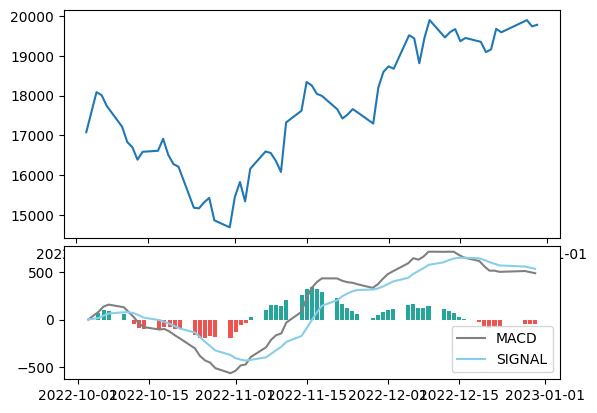

In [13]:
plot_macd(HSI_df_test['Close'], djia_macd['macd'], djia_macd['signal'], djia_macd['hist'])

##### calculate price and signal using implement_macd_strategy function

In [14]:
buy_price, sell_price, macd_signal = implement_macd_strategy(HSI_df_test['Close'], djia_macd)

##### plot buy sell signal

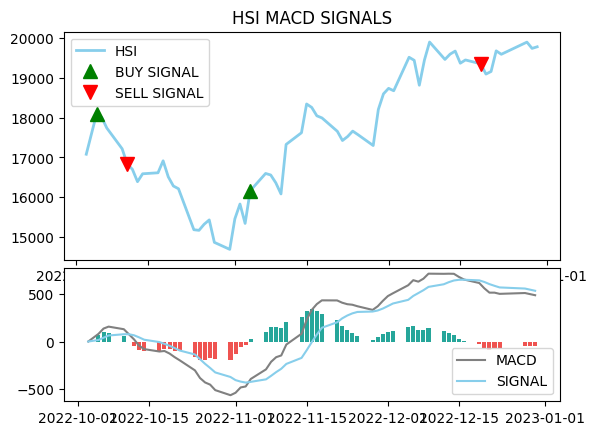

In [15]:
ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((8,1), (5,0), rowspan = 3, colspan = 1)

ax1.plot(HSI_df_test['Close'], color = 'skyblue', linewidth = 2, label = 'HSI')
ax1.plot(HSI_df_test.index, buy_price, marker = '^', color = 'green', markersize = 10, label = 'BUY SIGNAL', linewidth = 0)
ax1.plot(HSI_df_test.index, sell_price, marker = 'v', color = 'r', markersize = 10, label = 'SELL SIGNAL', linewidth = 0)
ax1.legend()
ax1.set_title('HSI MACD SIGNALS')
ax2.plot(djia_macd['macd'], color = 'grey', linewidth = 1.5, label = 'MACD')
ax2.plot(djia_macd['signal'], color = 'skyblue', linewidth = 1.5, label = 'SIGNAL')

for i in range(len(djia_macd)):
    if str(djia_macd['hist'][i])[0] == '-':
        ax2.bar(djia_macd.index[i], djia_macd['hist'][i], color = '#ef5350')
    else:
        ax2.bar(djia_macd.index[i], djia_macd['hist'][i], color = '#26a69a')
        
plt.legend(loc = 'lower right')
plt.show()

##### find position strategy

In [16]:
position = []
for i in range(len(macd_signal)):
    if macd_signal[i] >= 1:
        position.append(1)
    else:
        position.append(0)
        
for i in range(len(HSI_df_test['Close'])):
    if macd_signal[i] == 1:
        position[i] = 1
    elif macd_signal[i] == -1:
        position[i] = 0
    else:
        position[i] = position[i-1]
        
macd = djia_macd['macd']
signal = djia_macd['signal']
close_price = HSI_df_test['Close']
macd_signal = pd.DataFrame(macd_signal).rename(columns = {0:'macd_signal'}).set_index(HSI_df_test.index)
position = pd.DataFrame(position).rename(columns = {0:'macd_position'}).set_index(HSI_df_test.index)

frames = [close_price, macd, signal, macd_signal, position]
strategy = pd.concat(frames, join = 'inner', axis = 1)

strategy

,Close,macd,signal,macd_signal,macd_position
Date,,,,,
2022-10-03 00:00:00+08:00,17079.509766,0.000000,0.000000,0,0
2022-10-05 00:00:00+08:00,18087.970703,80.447026,16.089405,1,1
2022-10-06 00:00:00+08:00,18012.150391,136.510204,40.173565,0,1
2022-10-07 00:00:00+08:00,17740.050781,157.172723,63.573397,0,1
2022-10-10 00:00:00+08:00,17216.660156,129.818205,76.822358,0,1
...,...,...,...,...,...
2022-12-22 00:00:00+08:00,19679.220703,515.627667,587.603672,0,0
2022-12-23 00:00:00+08:00,19593.060547,502.902837,570.663505,0,0
2022-12-28 00:00:00+08:00,19898.910156,511.600414,558.850887,0,0


In [17]:
print(strategy.head(n=10).to_string(index=False))

       Close        macd    signal  macd_signal  macd_position
17079.509766    0.000000  0.000000            0              0
18087.970703   80.447026 16.089405            1              1
18012.150391  136.510204 40.173565            0              1
17740.050781  157.172723 63.573397            0              1
17216.660156  129.818205 76.822358            0              1
16832.359375   76.250720 76.708031           -1              0
16701.029297   22.936465 65.953718            0              0
16389.109375  -43.977847 43.967405            0              0
16587.689453  -80.061273 19.161669            0              0
16612.900391 -105.408255 -5.752316            0              0


### calculate returns 

In [18]:
googl_ret = pd.DataFrame(np.diff(HSI_df_test['Close'])).rename(columns = {0:'returns'})
macd_strategy_ret = []

for i in range(len(googl_ret)):
    try:
        returns = googl_ret['returns'][i]*strategy['macd_position'][i]
        macd_strategy_ret.append(returns)
    except:
        pass
    
macd_strategy_ret_df = pd.DataFrame(macd_strategy_ret).rename(columns = {0:'macd_returns'})

investment_value = 100000
number_of_stocks = floor(investment_value/HSI_df_test['Close'][0])
macd_investment_ret = []

for i in range(len(macd_strategy_ret_df['macd_returns'])):
    returns = number_of_stocks*macd_strategy_ret_df['macd_returns'][i]
    macd_investment_ret.append(returns)

macd_investment_ret_df = pd.DataFrame(macd_investment_ret).rename(columns = {0:'investment_returns'})
total_investment_ret = round(sum(macd_investment_ret_df['investment_returns']), 2)
profit_percentage = floor((total_investment_ret/investment_value)*100)
print(cl('Profit gained from the MACD strategy by investing $100k in HSI : {}'.format(total_investment_ret), attrs = ['bold']))
print(cl('Profit percentage of the MACD strategy : {}%'.format(profit_percentage), attrs = ['bold']))

Profit gained from the MACD strategy by investing $100k in HSI : 9680.3
Profit percentage of the MACD strategy : 9%


<a id='all_in_one'></a>
## 4. All in one functions

* get MA / MACD
* plot MA / MACD ^^
* calculate price and signal
* plot buy sell signal ^^
* find position strategy
* calculate returns

<a id='ma_all_functions'></a>
### 4a. MA all in one Functions

In [19]:
def calculate_ma_strategy(df, slow, fast): 
    # calculate ma 
    price = df['Close']
    ma1 = pd.DataFrame(price.rolling(fast).mean()).rename(columns = {'Close':'ma1'})
    ma2 = pd.DataFrame(price.rolling(slow).mean()).rename(columns = {'Close':'ma2'})
    hist = pd.DataFrame(ma1['ma1'] - ma2['ma2']).rename(columns = {0:'hist'})
    frames =  [ma1, ma2, hist]
    data = pd.concat(frames, join = 'inner', axis = 1)
    
    # find buy / sell / signal 
    buy_price = []
    sell_price = []
    ma_signal = []
    signal = 0
    
    for i in range(len(data)):
        if data['ma1'][i] > data['ma2'][i]:
            if signal != 1:
                buy_price.append(price[i])
                sell_price.append(np.nan)
                signal = 1
                ma_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                ma_signal.append(0)
        elif data['ma1'][i] < data['ma2'][i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(price[i])
                signal = -1
                ma_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                ma_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            ma_signal.append(0)
            
    # find position
    position = []
    for i in range(len(ma_signal)):
        if ma_signal[i] >= 1:
            position.append(1)
        else:
            position.append(0)

    for i in range(len(df['Close'])):
        if ma_signal[i] == 1:
            position[i] = 1
        elif ma_signal[i] == -1:
            position[i] = 0
        else:
            position[i] = position[i-1]

    ma1 = data['ma1']
    ma2 = data['ma2']
    close_price = df['Close']
    ma_signal = pd.DataFrame(ma_signal).rename(columns = {0:'ma_signal'}).set_index(df.index)
    position = pd.DataFrame(position).rename(columns = {0:'ma_position'}).set_index(df.index)
    
    frames = [ma_signal, position]
    strategy = pd.concat(frames, join = 'inner', axis = 1)
    
    data_return = pd.concat([df, data, strategy], join = 'inner', axis=1)  
    
    # find trade number 
    trade_num = []
    counter = 0
    for i in range(len(data_return['ma_position'])):
        if data_return['ma_position'][i] == 0: 
            trade_num.append(0)
        elif data_return['ma_position'][i] == 1:
            if data_return['ma_position'][i-1] == 0: 
                counter = counter + 1 
                trade_num.append(counter)
            else: 
                trade_num.append(counter)
        
    trade_num = pd.DataFrame(trade_num).rename(columns = {0:'trade_num'}).set_index(data_return.index)
    data_return = pd.concat([data_return, trade_num], join = 'inner', axis=1)  
    
    return data_return


In [24]:
def calculate_ma_return(df, slow, fast, investment_value, verbose): 
    # calculate ma 
    price = df['Close']
    ma1 = pd.DataFrame(price.rolling(fast).mean()).rename(columns = {'Close':'ma1'})
    ma2 = pd.DataFrame(price.rolling(slow).mean()).rename(columns = {'Close':'ma2'})
    hist = pd.DataFrame(ma1['ma1'] - ma2['ma2']).rename(columns = {0:'hist'})
    frames =  [ma1, ma2, hist]
    data = pd.concat(frames, join = 'inner', axis = 1)
    
    # find buy / sell / signal 
    buy_price = []
    sell_price = []
    ma_signal = []
    signal = 0
    
    for i in range(len(data)):
        if data['ma1'][i] > data['ma2'][i]:
            if signal != 1:
                buy_price.append(price[i])
                sell_price.append(np.nan)
                signal = 1
                ma_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                ma_signal.append(0)
        elif data['ma1'][i] < data['ma2'][i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(price[i])
                signal = -1
                ma_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                ma_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            ma_signal.append(0)
            
    # find position
    position = []
    for i in range(len(ma_signal)):
        if ma_signal[i] >= 1:
            position.append(1)
        else:
            position.append(0)

    for i in range(len(df['Close'])):
        if ma_signal[i] == 1:
            position[i] = 1
        elif ma_signal[i] == -1:
            position[i] = 0
        else:
            position[i] = position[i-1]

    ma1 = data['ma1']
    ma2 = data['ma2']
    close_price = df['Close']
    ma_signal = pd.DataFrame(ma_signal).rename(columns = {0:'ma_signal'}).set_index(df.index)
    position = pd.DataFrame(position).rename(columns = {0:'ma_position'}).set_index(df.index)

    frames = [ma_signal, position]
    strategy = pd.concat(frames, join = 'inner', axis = 1)
    
    data_return = pd.concat([df, data, strategy], join = 'inner', axis=1)  
    
    # find trade number 
    trade_num = []
    counter = 0
    for i in range(len(data_return['ma_position'])):
        if data_return['ma_position'][i] == 0: 
            trade_num.append(0)
        elif data_return['ma_position'][i] == 1:
            if data_return['ma_position'][i-1] == 0: 
                counter = counter + 1 
                trade_num.append(counter)
            else: 
                trade_num.append(counter)
        
    trade_num = pd.DataFrame(trade_num).rename(columns = {0:'trade_num'}).set_index(data_return.index)
    data_return = pd.concat([data_return, trade_num], join = 'inner', axis=1)  
    
    # calculate return and profit percentage
    _ret = pd.DataFrame(np.diff(df['Close'])).rename(columns = {0:'returns'})
    ma_strategy_ret = []
    ma_strategy_ret.append(0)
    for i in range(len(_ret)):
        try:
            returns = _ret['returns'][i]*strategy['ma_position'][i]
            ma_strategy_ret.append(returns)
        except:
            pass
    
    ma_strategy_ret_df = pd.DataFrame(ma_strategy_ret).rename(columns = {0:'ma_returns'})

    number_of_stocks = floor(investment_value/df['Close'][0])
    ma_investment_ret = []

    for i in range(len(ma_strategy_ret_df['ma_returns'])):
        returns = number_of_stocks*ma_strategy_ret_df['ma_returns'][i]
        ma_investment_ret.append(returns)

    ma_investment_ret_df = pd.DataFrame(ma_investment_ret).rename(columns = {0:'investment_returns'}).set_index(data_return.index)
    total_investment_ret = round(sum(ma_investment_ret_df['investment_returns']), 2)
    profit_percentage = floor((total_investment_ret/investment_value)*100)
    
    data_return = pd.concat([data_return, ma_investment_ret_df], join = 'inner', axis=1)  
    
    # caculate number of trades and win rate
    trade_count = data_return['trade_num'].max()
    d = {'Amount':'Total_Amount'}
    win_loss_trades_df = data_return.groupby(['trade_num'])['investment_returns'].sum().reset_index(name ='total_amount')
    win_count = len(win_loss_trades_df.loc[win_loss_trades_df.total_amount > 0])
    win_rate = floor((win_count/trade_count)*100)
    
    if verbose ==1:
        print(cl('Profit gained from the MA strategy by investing $100k: {}'.format(total_investment_ret), attrs = ['bold']))
        print(cl('Profit percentage of the MA strategy : {}%'.format(profit_percentage), attrs = ['bold']))
        print(cl('Trade win of the MA strategy : {}'.format(str(win_count) + '/'+ str(trade_count)), attrs = ['bold']))
        print(cl('Win Rate of the MA strategy : {}%'.format(win_rate), attrs = ['bold']))
    
    return total_investment_ret, profit_percentage, win_count, trade_count, win_rate


<a id='macd_all_functions'></a>
### 4b. MACD all in one Functions

In [21]:
def calculate_macd_strategy(df, slow, fast, smooth): 
    # calculate MACD
    price = df['Close']
    exp1 = price.ewm(span = fast, adjust = False).mean()
    exp2 = price.ewm(span = slow, adjust = False).mean()
    macd = pd.DataFrame(exp1 - exp2).rename(columns = {'Close':'macd'})
    signal = pd.DataFrame(macd.ewm(span = smooth, adjust = False).mean()).rename(columns = {'macd':'signal'})
    hist = pd.DataFrame(macd['macd'] - signal['signal']).rename(columns = {0:'hist'})
    frames =  [macd, signal, hist]
    data = pd.concat(frames, join = 'inner', axis = 1)
    
    # find MACD buy / sell / signal    
    buy_price = []
    sell_price = []
    macd_signal = []
    signal = 0

    for i in range(len(data)):
        if data['macd'][i] > data['signal'][i]:
            if signal != 1:
                buy_price.append(price[i])
                sell_price.append(np.nan)
                signal = 1
                macd_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                macd_signal.append(0)
        elif data['macd'][i] < data['signal'][i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(price[i])
                signal = -1
                macd_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                macd_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            macd_signal.append(0)
            
    # find MACD position
    position = []
    for i in range(len(macd_signal)):
        if macd_signal[i] >= 1:
            position.append(1)
        else:
            position.append(0)

    for i in range(len(df['Close'])):
        if macd_signal[i] == 1:
            position[i] = 1
        elif macd_signal[i] == -1:
            position[i] = 0
        else:
            position[i] = position[i-1]
        
    macd = data['macd']
    signal = data['signal']
    close_price = df['Close']
    macd_signal = pd.DataFrame(macd_signal).rename(columns = {0:'macd_signal'}).set_index(df.index)
    position = pd.DataFrame(position).rename(columns = {0:'macd_position'}).set_index(df.index)

    frames = [macd_signal, position]
    strategy = pd.concat(frames, join = 'inner', axis = 1)

    data_return = pd.concat([df, data, strategy], join = 'inner', axis=1)  
    
    # find trade number 
    trade_num = []
    counter = 0
    for i in range(len(data_return['macd_position'])):
        if data_return['macd_position'][i] == 0: 
            trade_num.append(0)
        elif data_return['macd_position'][i] == 1:
            if data_return['macd_position'][i-1] == 0: 
                counter = counter + 1 
                trade_num.append(counter)
            else: 
                trade_num.append(counter)
        
    trade_num = pd.DataFrame(trade_num).rename(columns = {0:'trade_num'}).set_index(data_return.index)
    data_return = pd.concat([data_return, trade_num], join = 'inner', axis=1)  
    
    return data_return

In [25]:
def calculate_macd_return(df, slow, fast, smooth, investment_value, verbose): 
    # calculate MACD
    price = df['Close']
    exp1 = price.ewm(span = fast, adjust = False).mean()
    exp2 = price.ewm(span = slow, adjust = False).mean()
    macd = pd.DataFrame(exp1 - exp2).rename(columns = {'Close':'macd'})
    signal = pd.DataFrame(macd.ewm(span = smooth, adjust = False).mean()).rename(columns = {'macd':'signal'})
    hist = pd.DataFrame(macd['macd'] - signal['signal']).rename(columns = {0:'hist'})
    frames =  [macd, signal, hist]
    data = pd.concat(frames, join = 'inner', axis = 1)
    
    # find MACD buy / sell / signal    
    buy_price = []
    sell_price = []
    macd_signal = []
    signal = 0

    for i in range(len(data)):
        if data['macd'][i] > data['signal'][i]:
            if signal != 1:
                buy_price.append(price[i])
                sell_price.append(np.nan)
                signal = 1
                macd_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                macd_signal.append(0)
        elif data['macd'][i] < data['signal'][i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(price[i])
                signal = -1
                macd_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                macd_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            macd_signal.append(0)
            
    
    # find MACD position
    position = []
    for i in range(len(macd_signal)):
        if macd_signal[i] >= 1:
            position.append(1)
        else:
            position.append(0)

    for i in range(len(df['Close'])):
        if macd_signal[i] == 1:
            position[i] = 1
        elif macd_signal[i] == -1:
            position[i] = 0
        else:
            position[i] = position[i-1]
        
    macd = data['macd']
    signal = data['signal']
    close_price = df['Close']
    macd_signal = pd.DataFrame(macd_signal).rename(columns = {0:'macd_signal'}).set_index(df.index)
    position = pd.DataFrame(position).rename(columns = {0:'macd_position'}).set_index(df.index)

    frames = [macd_signal, position]
    strategy = pd.concat(frames, join = 'inner', axis = 1)

    data_return = pd.concat([df, data, strategy], join = 'inner', axis=1)  
    
    # find trade number 
    trade_num = []
    counter = 0
    for i in range(len(data_return['macd_position'])):
        if data_return['macd_position'][i] == 0: 
            trade_num.append(0)
        elif data_return['macd_position'][i] == 1:
            if data_return['macd_position'][i-1] == 0: 
                counter = counter + 1 
                trade_num.append(counter)
            else: 
                trade_num.append(counter)
        
    trade_num = pd.DataFrame(trade_num).rename(columns = {0:'trade_num'}).set_index(data_return.index)
    data_return = pd.concat([data_return, trade_num], join = 'inner', axis=1)  
    
    # calculate return and profit percentage
    _ret = pd.DataFrame(np.diff(df['Close'])).rename(columns = {0:'returns'})
    macd_strategy_ret = []
    macd_strategy_ret.append(0)
    for i in range(len(_ret)):
        try:
            returns = _ret['returns'][i]*strategy['macd_position'][i]
            macd_strategy_ret.append(returns)
        except:
            pass
    
    macd_strategy_ret_df = pd.DataFrame(macd_strategy_ret).rename(columns = {0:'macd_returns'})

    number_of_stocks = floor(investment_value/df['Close'][0])
    macd_investment_ret = []

    for i in range(len(macd_strategy_ret_df['macd_returns'])):
        returns = number_of_stocks*macd_strategy_ret_df['macd_returns'][i]
        macd_investment_ret.append(returns)

    macd_investment_ret_df = pd.DataFrame(macd_investment_ret).rename(columns = {0:'investment_returns'}).set_index(data_return.index)
    total_investment_ret = round(sum(macd_investment_ret_df['investment_returns']), 2)
    profit_percentage = floor((total_investment_ret/investment_value)*100)
    
    data_return = pd.concat([data_return, macd_investment_ret_df], join = 'inner', axis=1)  
    
    # caculate number of trades and win rate
    trade_count = data_return['trade_num'].max()
    win_loss_trades_df = data_return.groupby(['trade_num'])['investment_returns'].sum().reset_index(name ='total_amount')
    win_count = len(win_loss_trades_df.loc[win_loss_trades_df.total_amount > 0])
    win_rate = floor((win_count/trade_count)*100)
    
    if verbose == 1:
        print(cl('Profit gained from the MACD strategy by investing $100k: {}'.format(total_investment_ret), attrs = ['bold']))
        print(cl('Profit percentage of the MACD strategy : {}%'.format(profit_percentage), attrs = ['bold']))
        print(cl('Trade win of the MACD strategy : {}'.format(str(win_count) + '/'+ str(trade_count)), attrs = ['bold']))
        print(cl('Win Rate of the MACD strategy : {}%'.format(win_rate), attrs = ['bold']))
    
    return total_investment_ret, profit_percentage, win_count, trade_count, win_rate

<a id='find_parameters'></a>
## 5. find model Parameters that produce best win rate and return

In [26]:
def get_df_var_name(data):
    name =[x for x in globals() if globals()[x] is data][0]
    return name

In [31]:
from tqdm import tqdm
from tqdm.contrib import itertools
import time

<a id='5a1_HSI_MA'></a>
### 5a-1. HSI MA 

In [133]:
#HSI MA

dataset_group = []
model = []
model_fast = []
model_slow = []

total_investment_ret = [] 
profit_percentage = [] 
win_count = []
trade_count = []
win_rate = []

train_data = [HSI_df_A_train, HSI_df_B_train, HSI_df_C_train, HSI_df_D_train]

for data in train_data:
    for fast_i in tqdm(range(1,31)):
        for slow_i in range(1,31): 
            if slow_i - fast_i > 4: # min 4 days different between fast and slow 
                result = calculate_ma_return(data, slow_i, fast_i, 100000, 0)
                dataset_group.append(get_df_var_name(data))
                model.append('MA')
                model_fast.append(fast_i)
                model_slow.append(slow_i)
                
                total_investment_ret.append(result[0])
                profit_percentage.append(result[1])
                win_count.append(result[2])
                trade_count.append(result[3])
                win_rate.append(result[4])
                
HSI_MA_train_result30 = pd.DataFrame(list(zip(dataset_group, model, model_fast, model_slow, total_investment_ret, profit_percentage, win_count, trade_count, win_rate)),
               columns =['dataset_group', 'model', 'model_fast', 'model_slow', 'total_investment_ret', 'profit_percentage', 'win_count', 'trade_count', 'win_rate'])
                

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [01:30<00:00,  3.02s/it]


#### HSI MA top 5

In [134]:
## include tie records
HSI_MA_top5 = HSI_MA_train_result30[HSI_MA_train_result30.groupby('dataset_group')['win_rate'].rank(method = 'dense', ascending=False) <= 5]
HSI_MA_top5 = HSI_MA_top5.sort_values(['dataset_group','win_rate'] , ascending=[True,False])

In [135]:
# only top 5 per group, sort by win rate and top investment return
HSI_MA_train_result30.sort_values(['win_rate', 'total_investment_ret'], ascending=[False, False], inplace=True)
df = HSI_MA_train_result30
df['overall_rank'] = 1
df['overall_rank'] = df.groupby(['dataset_group'])['overall_rank'].cumsum()
df2 = df[df.groupby('dataset_group')['overall_rank'].rank(ascending=True) <= 5]
HSI_MA_top5_30 = df2.sort_values(['dataset_group','overall_rank'] , ascending=[True,True])

In [136]:
HSI_MA_top5_30

,dataset_group,model,model_fast,model_slow,total_investment_ret,profit_percentage,win_count,trade_count,win_rate,overall_rank
214,HSI_df_A_train,MA,11,25,10658.44,10,11,15,73,1
201,HSI_df_A_train,MA,10,27,6867.70,6,10,14,71,2
186,HSI_df_A_train,MA,9,28,7211.14,7,9,13,69,3
9,HSI_df_A_train,MA,1,15,15793.96,15,28,41,68,4
200,HSI_df_A_train,MA,10,26,14169.40,14,11,16,68,5
326,HSI_df_B_train,MA,1,7,5550.90,5,88,138,63,1
325,HSI_df_B_train,MA,1,6,8353.24,8,97,161,60,2
327,HSI_df_B_train,MA,1,8,2498.49,2,80,132,60,3
337,HSI_df_B_train,MA,1,18,15340.08,15,45,77,58,4
335,HSI_df_B_train,MA,1,16,14653.58,14,47,82,57,5


In [137]:
my_pick_HSI_MA_30 = HSI_MA_top5_30[HSI_MA_top5_30.groupby('dataset_group')['total_investment_ret'].rank(ascending=False) <= 1]
my_pick_HSI_MA_30 = my_pick_HSI_MA_30.sort_values(['dataset_group','total_investment_ret'] , ascending=[True,False])

In [138]:
my_pick_HSI_MA_30

,dataset_group,model,model_fast,model_slow,total_investment_ret,profit_percentage,win_count,trade_count,win_rate,overall_rank
9,HSI_df_A_train,MA,1,15,15793.96,15,28,41,68,4
337,HSI_df_B_train,MA,1,18,15340.08,15,45,77,58,4
661,HSI_df_C_train,MA,1,17,20000.30,20,75,127,59,4
975,HSI_df_D_train,MA,1,6,30377.69,30,193,319,60,2


In [143]:
A_test_HSI_MA_30 = calculate_ma_return(HSI_df_A_test,15,1,100000,1)

Profit gained from the MA strategy by investing $100k: 8441.23
Profit percentage of the MA strategy : 8%
Trade win of the MA strategy : 20/44
Win Rate of the MA strategy : 45%


In [144]:
B_test_HSI_MA_30 = calculate_ma_return(HSI_df_B_test,18,1,100000,1)

Profit gained from the MA strategy by investing $100k: 1984.02
Profit percentage of the MA strategy : 1%
Trade win of the MA strategy : 23/44
Win Rate of the MA strategy : 52%


In [145]:
C_test_HSI_MA_30 = calculate_ma_return(HSI_df_C_test,17,1,100000,1)

Profit gained from the MA strategy by investing $100k: 6036.31
Profit percentage of the MA strategy : 6%
Trade win of the MA strategy : 29/55
Win Rate of the MA strategy : 52%


In [146]:
D_test_HSI_MA_30 = calculate_ma_return(HSI_df_D_test,6,1,100000,1)

Profit gained from the MA strategy by investing $100k: -1340.76
Profit percentage of the MA strategy : -2%
Trade win of the MA strategy : 47/76
Win Rate of the MA strategy : 61%


<a id='5a2_HSI_MACD'></a>
### 5a-2 HSI MACD

In [39]:
#HSI MACD

dataset_group = []
model = []
model_fast = []
model_slow = []
model_smooth = []

total_investment_ret = [] 
profit_percentage = [] 
win_count = []
trade_count = []
win_rate = []

train_hsi_macd_data = [HSI_df_A_train, HSI_df_B_train, HSI_df_C_train, HSI_df_D_train]

for data in train_hsi_macd_data:
    for fast_i in tqdm(range(1,31)):
        for slow_i in range(1,31): 
            if slow_i - fast_i > 4: # min 4 days different between fast and slow 
                result = calculate_macd_return(data, slow_i, fast_i, 9, 100000,0)
                dataset_group.append(get_df_var_name(data))
                model.append('MACD')
                model_fast.append(fast_i)
                model_slow.append(slow_i)
                model_smooth.append(9)
                
                total_investment_ret.append(result[0])
                profit_percentage.append(result[1])
                win_count.append(result[2])
                trade_count.append(result[3])
                win_rate.append(result[4])
                
HSI_MACD_train_result30 = pd.DataFrame(list(zip(dataset_group, model, model_fast, model_slow, model_smooth, total_investment_ret, profit_percentage, win_count, trade_count, win_rate)),
               columns =['dataset_group', 'model', 'model_fast', 'model_slow', 'model_smooth', 'total_investment_ret', 'profit_percentage', 'win_count', 'trade_count', 'win_rate'])
                

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [01:09<00:00,  2.31s/it]


#### HSI MACD top 5

In [40]:
# include tie records
HSI_MACD_top5 = HSI_MACD_train_result30[HSI_MACD_train_result30.groupby('dataset_group')['win_rate'].rank(method = 'dense', ascending=False) <= 5]
HSI_MACD_top5 = HSI_MACD_top5.sort_values(['dataset_group','win_rate'] , ascending=[True,False])


In [41]:
# only top 5 per group, sort by win rate and top investment return
HSI_MACD_train_result30.sort_values(['win_rate', 'total_investment_ret'], ascending=[False, False], inplace=True)
df = HSI_MACD_train_result30
df['overall_rank'] = 1
df['overall_rank'] = df.groupby(['dataset_group'])['overall_rank'].cumsum()
df2 = df[df.groupby('dataset_group')['overall_rank'].rank(ascending=True) <= 5]
HSI_MACD_top5_30 = df2.sort_values(['dataset_group','overall_rank'] , ascending=[True,True])

In [42]:
HSI_MACD_top5_30

,dataset_group,model,model_fast,model_slow,model_smooth,total_investment_ret,profit_percentage,win_count,trade_count,win_rate,overall_rank
169,HSI_df_A_train,MACD,8,28,9,12225.75,12,20,30,66,1
170,HSI_df_A_train,MACD,8,29,9,10770.81,10,20,30,66,2
145,HSI_df_A_train,MACD,7,22,9,13791.26,13,19,29,65,3
171,HSI_df_A_train,MACD,8,30,9,8582.26,8,19,29,65,4
165,HSI_df_A_train,MACD,8,24,9,16641.05,16,18,28,64,5
496,HSI_df_B_train,MACD,8,30,9,14193.75,14,36,59,61,1
418,HSI_df_B_train,MACD,4,30,9,8405.62,8,47,77,61,2
494,HSI_df_B_train,MACD,8,28,9,19122.74,19,36,60,60,3
495,HSI_df_B_train,MACD,8,29,9,16702.20,16,36,60,60,4
458,HSI_df_B_train,MACD,6,29,9,16210.69,16,39,65,60,5


In [69]:
my_pick_HSI_MACD_30 = HSI_MACD_top5_30[HSI_MACD_top5_30.groupby('dataset_group')['total_investment_ret'].rank(ascending=False) <= 1]
my_pick_HSI_MACD_30 = my_pick_HSI_MACD_30.sort_values(['dataset_group','total_investment_ret'] , ascending=[True,False])

In [70]:
my_pick_HSI_MACD_30

,dataset_group,model,model_fast,model_slow,model_smooth,total_investment_ret,profit_percentage,win_count,trade_count,win_rate,overall_rank
165,HSI_df_A_train,MACD,8,24,9,16641.05,16,18,28,64,5
494,HSI_df_B_train,MACD,8,28,9,19122.74,19,36,60,60,3
722,HSI_df_C_train,MACD,4,9,9,16595.24,16,98,161,60,2
1084,HSI_df_D_train,MACD,5,25,9,40465.68,40,89,148,60,5


In [71]:
A_test_HSI_MACD_30 = calculate_macd_return(HSI_df_A_test,24,8,9,100000,1)

Profit gained from the MACD strategy by investing $100k: 8550.17
Profit percentage of the MACD strategy : 8%
Trade win of the MACD strategy : 16/32
Win Rate of the MACD strategy : 50%


In [72]:
B_test_HSI_MACD_30 = calculate_macd_return(HSI_df_B_test,28,8,9,100000,1)

Profit gained from the MACD strategy by investing $100k: 112.25
Profit percentage of the MACD strategy : 0%
Trade win of the MACD strategy : 16/36
Win Rate of the MACD strategy : 44%


In [73]:
C_test_HSI_MACD_30 = calculate_macd_return(HSI_df_C_test,9,4,9,100000,1)

Profit gained from the MACD strategy by investing $100k: 15382.57
Profit percentage of the MACD strategy : 15%
Trade win of the MACD strategy : 40/63
Win Rate of the MACD strategy : 63%


In [74]:
D_test_HSI_MACD_30 = calculate_macd_return(HSI_df_D_test,25,5,9,100000,1)

Profit gained from the MACD strategy by investing $100k: -19304.93
Profit percentage of the MACD strategy : -20%
Trade win of the MACD strategy : 19/45
Win Rate of the MACD strategy : 42%


<a id='5a3_DJIA_MA'></a>
### 5a-3 DJIA MA 

In [52]:
# DJIA MA

dataset_group = []
model = []
model_fast = []
model_slow = []

total_investment_ret = [] 
profit_percentage = [] 
win_count = []
trade_count = []
win_rate = []

train_data = [DJIA_df_A_train, DJIA_df_B_train, DJIA_df_C_train, DJIA_df_D_train]

for data in train_data:
    for fast_i in tqdm(range(1,31)):
        for slow_i in range(1,31): 
            if slow_i - fast_i > 4: # min 4 days different between fast and slow 
                result = calculate_ma_return(data, slow_i, fast_i, 100000, 0)
                dataset_group.append(get_df_var_name(data))
                model.append('MA')
                model_fast.append(fast_i)
                model_slow.append(slow_i)
                
                total_investment_ret.append(result[0])
                profit_percentage.append(result[1])
                win_count.append(result[2])
                trade_count.append(result[3])
                win_rate.append(result[4])
                
DJIA_MA_train_result = pd.DataFrame(list(zip(dataset_group, model, model_fast, model_slow, total_investment_ret, profit_percentage, win_count, trade_count, win_rate)),
               columns =['dataset_group', 'model', 'model_fast', 'model_slow', 'total_investment_ret', 'profit_percentage', 'win_count', 'trade_count', 'win_rate'])
                

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [01:34<00:00,  3.15s/it]


#### DJIA MA top 5

In [54]:
## include tie records
DJIA_MA_top5 = DJIA_MA_train_result[DJIA_MA_train_result.groupby('dataset_group')['win_rate'].rank(method = 'dense', ascending=False) <= 5]
DJIA_MA_top5 = DJIA_MA_top5.sort_values(['dataset_group','win_rate'] , ascending=[True,False])

In [55]:
# only top 5 per group, sort by win rate and top investment return
DJIA_MA_train_result.sort_values(['win_rate', 'total_investment_ret'], ascending=[False, False], inplace=True)
df = DJIA_MA_train_result
df['overall_rank'] = 1
df['overall_rank'] = df.groupby(['dataset_group'])['overall_rank'].cumsum()
df2 = df[df.groupby('dataset_group')['overall_rank'].rank(ascending=True) <= 5]
DJIA_MA_top5 = df2.sort_values(['dataset_group','overall_rank'] , ascending=[True,True])

In [56]:
DJIA_MA_top5

,dataset_group,model,model_fast,model_slow,total_investment_ret,profit_percentage,win_count,trade_count,win_rate,overall_rank
293,DJIA_df_A_train,MA,18,27,18584.22,18,8,12,66,1
231,DJIA_df_A_train,MA,12,28,11057.33,11,8,12,66,2
265,DJIA_df_A_train,MA,15,26,6246.03,6,10,15,66,3
298,DJIA_df_A_train,MA,19,25,22814.38,22,11,17,64,4
152,DJIA_df_A_train,MA,7,29,8515.58,8,9,14,64,5
520,DJIA_df_B_train,MA,10,21,27407.52,27,22,33,66,1
459,DJIA_df_B_train,MA,6,30,29680.16,29,17,26,65,2
506,DJIA_df_B_train,MA,9,23,20367.16,20,21,32,65,3
507,DJIA_df_B_train,MA,9,24,28985.48,28,19,30,63,4
519,DJIA_df_B_train,MA,10,20,25800.75,25,24,38,63,5


In [81]:
my_pick = DJIA_MA_top5[DJIA_MA_top5.groupby('dataset_group')['total_investment_ret'].rank(ascending=False) <= 1]
my_pick = my_pick.sort_values(['dataset_group','total_investment_ret'] , ascending=[True,False])

In [82]:
my_pick

,dataset_group,model,model_fast,model_slow,total_investment_ret,profit_percentage,win_count,trade_count,win_rate,overall_rank
298,DJIA_df_A_train,MA,19,25,22814.38,22,11,17,64,4
459,DJIA_df_B_train,MA,6,30,29680.16,29,17,26,65,2
944,DJIA_df_C_train,MA,18,28,52672.70,52,24,40,60,3
1269,DJIA_df_D_train,MA,18,28,82388.83,82,33,55,60,1


In [83]:
A_test = calculate_ma_return(DJIA_df_A_test,25,19,100000,1)

Profit gained from the MA strategy by investing $100k: 3794.19
Profit percentage of the MA strategy : 3%
Trade win of the MA strategy : 9/18
Win Rate of the MA strategy : 50%


In [84]:
B_test = calculate_ma_return(DJIA_df_B_test,30,6,100000,1)

Profit gained from the MA strategy by investing $100k: 6991.28
Profit percentage of the MA strategy : 6%
Trade win of the MA strategy : 8/16
Win Rate of the MA strategy : 50%


In [85]:
C_test = calculate_ma_return(DJIA_df_C_test,28,18,100000,1)

Profit gained from the MA strategy by investing $100k: 20161.61
Profit percentage of the MA strategy : 20%
Trade win of the MA strategy : 9/15
Win Rate of the MA strategy : 60%


In [86]:
D_test = calculate_ma_return(DJIA_df_D_test,28,18,100000,1)

Profit gained from the MA strategy by investing $100k: 8511.1
Profit percentage of the MA strategy : 8%
Trade win of the MA strategy : 7/15
Win Rate of the MA strategy : 46%


<a id='5a4_DJI_MACD'></a>
### 5a-4 DJI MACD

In [57]:
# DJI MACD

dataset_group = []
model = []
model_fast = []
model_slow = []
model_smooth = []

total_investment_ret = [] 
profit_percentage = [] 
win_count = []
trade_count = []
win_rate = []

train_djia_macd_data = [DJIA_df_A_train, DJIA_df_B_train, DJIA_df_C_train, DJIA_df_D_train]

for data in train_djia_macd_data:
    for fast_i in tqdm(range(1,31)):
        for slow_i in range(1,31): 
            if slow_i - fast_i > 4: # min 4 days different between fast and slow 
                result = calculate_macd_return(data, slow_i, fast_i, 9, 100000,0)
                dataset_group.append(get_df_var_name(data))
                model.append('MACD')
                model_fast.append(fast_i)
                model_slow.append(slow_i)
                model_smooth.append(9)
                
                total_investment_ret.append(result[0])
                profit_percentage.append(result[1])
                win_count.append(result[2])
                trade_count.append(result[3])
                win_rate.append(result[4])
                
DJIA_MACD_train_result = pd.DataFrame(list(zip(dataset_group, model, model_fast, model_slow, model_smooth, total_investment_ret, profit_percentage, win_count, trade_count, win_rate)),
               columns =['dataset_group', 'model', 'model_fast', 'model_slow', 'model_smooth', 'total_investment_ret', 'profit_percentage', 'win_count', 'trade_count', 'win_rate'])
                

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [01:24<00:00,  2.82s/it]


#### DJIA MACD top 5

In [58]:
# include tie records
DJIA_MACD_top5 = DJIA_MACD_train_result[DJIA_MACD_train_result.groupby('dataset_group')['win_rate'].rank(method = 'dense', ascending=False) <= 5]
DJIA_MACD_top5 = DJIA_MACD_top5.sort_values(['dataset_group','win_rate'] , ascending=[True,False])

In [59]:
# only top 5 per group, sort by win rate and top investment return
DJIA_MACD_train_result.sort_values(['win_rate', 'total_investment_ret'], ascending=[False, False], inplace=True)
df = DJIA_MACD_train_result
df['overall_rank'] = 1
df['overall_rank'] = df.groupby(['dataset_group'])['overall_rank'].cumsum()
df2 = df[df.groupby('dataset_group')['overall_rank'].rank(ascending=True) <= 5]
DJIA_MACD_top5 = df2.sort_values(['dataset_group','overall_rank'] , ascending=[True,True])

In [60]:
DJIA_MACD_top5

,dataset_group,model,model_fast,model_slow,model_smooth,total_investment_ret,profit_percentage,win_count,trade_count,win_rate,overall_rank
200,DJIA_df_A_train,MACD,10,26,9,-5852.51,-6,21,32,65,1
202,DJIA_df_A_train,MACD,10,28,9,-2437.06,-3,20,31,64,2
242,DJIA_df_A_train,MACD,13,26,9,-1198.96,-2,19,30,63,3
253,DJIA_df_A_train,MACD,14,25,9,-1334.97,-2,19,30,63,4
214,DJIA_df_A_train,MACD,11,25,9,-1665.73,-2,19,30,63,5
539,DJIA_df_B_train,MACD,11,25,9,21972.87,21,41,60,68,1
527,DJIA_df_B_train,MACD,10,28,9,21065.88,21,42,61,68,2
540,DJIA_df_B_train,MACD,11,26,9,19467.64,19,41,60,68,3
525,DJIA_df_B_train,MACD,10,26,9,16475.13,16,43,63,68,4
572,DJIA_df_B_train,MACD,14,19,9,22216.82,22,39,58,67,5


In [63]:
my_pick = DJIA_MACD_top5[DJIA_MACD_top5.groupby('dataset_group')['total_investment_ret'].rank(ascending=False) <= 1]
my_pick = my_pick.sort_values(['dataset_group','total_investment_ret'] , ascending=[True,False])

In [64]:
my_pick

,dataset_group,model,model_fast,model_slow,model_smooth,total_investment_ret,profit_percentage,win_count,trade_count,win_rate,overall_rank
242,DJIA_df_A_train,MACD,13,26,9,-1198.96,-2,19,30,63,3
572,DJIA_df_B_train,MACD,14,19,9,22216.82,22,39,58,67,5
809,DJIA_df_C_train,MACD,8,18,9,11862.59,11,70,112,62,2
1134,DJIA_df_D_train,MACD,8,18,9,63099.34,63,97,147,65,1


In [65]:
DJIA_MACD_A_test = calculate_macd_return(DJIA_df_A_test,26,13,9,100000,1)

Profit gained from the MACD strategy by investing $100k: 25812.65
Profit percentage of the MACD strategy : 25%
Trade win of the MACD strategy : 18/27
Win Rate of the MACD strategy : 66%


In [66]:
DJIA_MACD_B_test = calculate_macd_return(DJIA_df_B_test,19,14,9,100000,1)

Profit gained from the MACD strategy by investing $100k: 6733.88
Profit percentage of the MACD strategy : 6%
Trade win of the MACD strategy : 15/35
Win Rate of the MACD strategy : 42%


In [67]:
DJIA_MACD_C_test = calculate_macd_return(DJIA_df_C_test,18,8,9,100000,1)

Profit gained from the MACD strategy by investing $100k: 35860.82
Profit percentage of the MACD strategy : 35%
Trade win of the MACD strategy : 27/37
Win Rate of the MACD strategy : 72%


In [68]:
DJIA_MACD_D_test = calculate_macd_return(DJIA_df_D_test,18,8,9,100000,1)

Profit gained from the MACD strategy by investing $100k: 12790.95
Profit percentage of the MACD strategy : 12%
Trade win of the MACD strategy : 22/35
Win Rate of the MACD strategy : 62%


<a id='5b1_HSI_MA'></a>
### 5b-1 HSI MA 60 max

In [87]:
#HSI MA

dataset_group = []
model = []
model_fast = []
model_slow = []

total_investment_ret = [] 
profit_percentage = [] 
win_count = []
trade_count = []
win_rate = []

train_data = [HSI_df_A_train, HSI_df_B_train, HSI_df_C_train, HSI_df_D_train]

for data in train_data:
    for fast_i in tqdm(range(1,61)):
        for slow_i in range(1,61): 
            if slow_i - fast_i > 4: # min 4 days different between fast and slow 
                result = calculate_ma_return(data, slow_i, fast_i, 100000, 0)
                dataset_group.append(get_df_var_name(data))
                model.append('MA')
                model_fast.append(fast_i)
                model_slow.append(slow_i)
                
                total_investment_ret.append(result[0])
                profit_percentage.append(result[1])
                win_count.append(result[2])
                trade_count.append(result[3])
                win_rate.append(result[4])
                
HSI_MA_train_result = pd.DataFrame(list(zip(dataset_group, model, model_fast, model_slow, total_investment_ret, profit_percentage, win_count, trade_count, win_rate)),
               columns =['dataset_group', 'model', 'model_fast', 'model_slow', 'total_investment_ret', 'profit_percentage', 'win_count', 'trade_count', 'win_rate'])
                

100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [05:18<00:00,  5.30s/it]


#### HSI MA top 5

In [88]:
## include tie records
HSI_MA_top5 = HSI_MA_train_result[HSI_MA_train_result.groupby('dataset_group')['win_rate'].rank(method = 'dense', ascending=False) <= 5]
HSI_MA_top5 = HSI_MA_top5.sort_values(['dataset_group','win_rate'] , ascending=[True,False])

In [89]:
# only top 5 per group, sort by win rate and top investment return
HSI_MA_train_result.sort_values(['win_rate', 'total_investment_ret'], ascending=[False, False], inplace=True)
df = HSI_MA_train_result
df['overall_rank'] = 1
df['overall_rank'] = df.groupby(['dataset_group'])['overall_rank'].cumsum()
df2 = df[df.groupby('dataset_group')['overall_rank'].rank(ascending=True) <= 5]
HSI_MA_top5 = df2.sort_values(['dataset_group','overall_rank'] , ascending=[True,True])

In [90]:
HSI_MA_top5

,dataset_group,model,model_fast,model_slow,total_investment_ret,profit_percentage,win_count,trade_count,win_rate,overall_rank
706,HSI_df_A_train,MA,15,47,24414.42,24,5,6,83,1
709,HSI_df_A_train,MA,15,50,26363.10,26,4,5,80,2
1111,HSI_df_A_train,MA,27,38,11313.45,11,8,10,80,3
853,HSI_df_A_train,MA,19,40,10559.52,10,7,9,77,4
927,HSI_df_A_train,MA,21,43,13809.06,13,6,8,75,5
2989,HSI_df_B_train,MA,43,48,15557.06,15,18,27,66,1
2846,HSI_df_B_train,MA,34,58,14698.48,14,8,12,66,2
2825,HSI_df_B_train,MA,33,59,14528.97,14,8,12,66,3
2866,HSI_df_B_train,MA,35,57,12235.42,12,8,12,66,4
2865,HSI_df_B_train,MA,35,56,12153.52,12,8,12,66,5


In [91]:
my_pick = HSI_MA_top5[HSI_MA_top5.groupby('dataset_group')['total_investment_ret'].rank(ascending=False) <= 1]
my_pick = my_pick.sort_values(['dataset_group','total_investment_ret'] , ascending=[True,False])

In [92]:
my_pick

,dataset_group,model,model_fast,model_slow,total_investment_ret,profit_percentage,win_count,trade_count,win_rate,overall_rank
709,HSI_df_A_train,MA,15,50,26363.10,26,4,5,80,2
2989,HSI_df_B_train,MA,43,48,15557.06,15,18,27,66,1
4363,HSI_df_C_train,MA,33,57,28265.17,28,13,19,68,2
5903,HSI_df_D_train,MA,33,57,43112.58,43,16,25,64,2


In [93]:
A_test = calculate_ma_return(HSI_df_A_test,24,15,100000,1)

Profit gained from the MA strategy by investing $100k: -6337.58
Profit percentage of the MA strategy : -7%
Trade win of the MA strategy : 8/18
Win Rate of the MA strategy : 44%


In [94]:
B_test = calculate_ma_return(HSI_df_B_test,28,18,100000,1)

Profit gained from the MA strategy by investing $100k: 8976.27
Profit percentage of the MA strategy : 8%
Trade win of the MA strategy : 7/13
Win Rate of the MA strategy : 53%


In [95]:
C_test = calculate_ma_return(HSI_df_C_test,17,1,100000,1)

Profit gained from the MA strategy by investing $100k: 6036.31
Profit percentage of the MA strategy : 6%
Trade win of the MA strategy : 29/55
Win Rate of the MA strategy : 52%


In [96]:
D_test = calculate_ma_return(HSI_df_D_test,6,1,100000,1)

Profit gained from the MA strategy by investing $100k: -1340.76
Profit percentage of the MA strategy : -2%
Trade win of the MA strategy : 47/76
Win Rate of the MA strategy : 61%


<a id='5b2_HSI_MACD'></a>
### 5b-2 HSI MACD

In [97]:
#HSI MACD

dataset_group = []
model = []
model_fast = []
model_slow = []
model_smooth = []

total_investment_ret = [] 
profit_percentage = [] 
win_count = []
trade_count = []
win_rate = []

train_hsi_macd_data = [HSI_df_A_train, HSI_df_B_train, HSI_df_C_train, HSI_df_D_train]

for data in train_hsi_macd_data:
    for fast_i in tqdm(range(1,61)):
        for slow_i in range(1,61): 
            if slow_i - fast_i > 4: # min 4 days different between fast and slow 
                result = calculate_macd_return(data, slow_i, fast_i, 9, 100000,0)
                dataset_group.append(get_df_var_name(data))
                model.append('MACD')
                model_fast.append(fast_i)
                model_slow.append(slow_i)
                model_smooth.append(9)
                
                total_investment_ret.append(result[0])
                profit_percentage.append(result[1])
                win_count.append(result[2])
                trade_count.append(result[3])
                win_rate.append(result[4])
                
HSI_MACD_train_result = pd.DataFrame(list(zip(dataset_group, model, model_fast, model_slow, model_smooth, total_investment_ret, profit_percentage, win_count, trade_count, win_rate)),
               columns =['dataset_group', 'model', 'model_fast', 'model_slow', 'model_smooth', 'total_investment_ret', 'profit_percentage', 'win_count', 'trade_count', 'win_rate'])
                

100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [05:09<00:00,  5.16s/it]


#### HSI MACD top 5

In [98]:
# include tie records
HSI_MACD_top5 = HSI_MACD_train_result[HSI_MACD_train_result.groupby('dataset_group')['win_rate'].rank(method = 'dense', ascending=False) <= 5]
HSI_MACD_top5 = HSI_MACD_top5.sort_values(['dataset_group','win_rate'] , ascending=[True,False])


In [99]:
# only top 5 per group, sort by win rate and top investment return
HSI_MACD_train_result.sort_values(['win_rate', 'total_investment_ret'], ascending=[False, False], inplace=True)
df = HSI_MACD_train_result
df['overall_rank'] = 1
df['overall_rank'] = df.groupby(['dataset_group'])['overall_rank'].cumsum()
df2 = df[df.groupby('dataset_group')['overall_rank'].rank(ascending=True) <= 5]
HSI_MACD_top5 = df2.sort_values(['dataset_group','overall_rank'] , ascending=[True,True])

In [100]:
HSI_MACD_top5

,dataset_group,model,model_fast,model_slow,model_smooth,total_investment_ret,profit_percentage,win_count,trade_count,win_rate,overall_rank
379,HSI_df_A_train,MACD,8,28,9,12225.75,12,20,30,66,1
380,HSI_df_A_train,MACD,8,29,9,10770.81,10,20,30,66,2
325,HSI_df_A_train,MACD,7,22,9,13791.26,13,19,29,65,3
381,HSI_df_A_train,MACD,8,30,9,8582.26,8,19,29,65,4
375,HSI_df_A_train,MACD,8,24,9,16641.05,16,18,28,64,5
1578,HSI_df_B_train,MACD,1,44,9,12574.83,12,92,142,64,1
1579,HSI_df_B_train,MACD,1,45,9,12055.05,12,91,142,64,2
1577,HSI_df_B_train,MACD,1,43,9,11233.89,11,91,142,64,3
1583,HSI_df_B_train,MACD,1,49,9,14894.48,14,90,141,63,4
1582,HSI_df_B_train,MACD,1,48,9,14569.01,14,90,141,63,5


In [101]:
my_pick = HSI_MACD_top5[HSI_MACD_top5.groupby('dataset_group')['total_investment_ret'].rank(ascending=False) <= 1]
my_pick = my_pick.sort_values(['dataset_group','total_investment_ret'] , ascending=[True,False])

In [102]:
my_pick

,dataset_group,model,model_fast,model_slow,model_smooth,total_investment_ret,profit_percentage,win_count,trade_count,win_rate,overall_rank
375,HSI_df_A_train,MACD,8,24,9,16641.05,16,18,28,64,5
1583,HSI_df_B_train,MACD,1,49,9,14894.48,14,90,141,63,4
3122,HSI_df_C_train,MACD,1,48,9,17584.45,17,136,215,63,1
4657,HSI_df_D_train,MACD,1,43,9,43171.32,43,179,287,62,1


In [103]:
A_test = calculate_macd_return(HSI_df_A_test,24,8,9,100000,1)

Profit gained from the MACD strategy by investing $100k: 8550.17
Profit percentage of the MACD strategy : 8%
Trade win of the MACD strategy : 16/32
Win Rate of the MACD strategy : 50%


In [117]:
B_test = calculate_macd_return(HSI_df_B_test,49,1,9,100000,1)

Profit gained from the MACD strategy by investing $100k: 4220.55
Profit percentage of the MACD strategy : 4%
Trade win of the MACD strategy : 46/74
Win Rate of the MACD strategy : 62%


In [118]:
C_test = calculate_macd_return(HSI_df_C_test,48,1,9,100000,1)

Profit gained from the MACD strategy by investing $100k: 31405.77
Profit percentage of the MACD strategy : 31%
Trade win of the MACD strategy : 43/73
Win Rate of the MACD strategy : 58%


In [119]:
D_test = calculate_macd_return(HSI_df_D_test,43,1,9,100000,1)

Profit gained from the MACD strategy by investing $100k: -195.54
Profit percentage of the MACD strategy : -1%
Trade win of the MACD strategy : 40/72
Win Rate of the MACD strategy : 55%


<a id='5b3_DJIA_MA'></a>
### 5b-3 DJIA MA 

In [107]:
# DJIA MA

dataset_group = []
model = []
model_fast = []
model_slow = []

total_investment_ret = [] 
profit_percentage = [] 
win_count = []
trade_count = []
win_rate = []

train_data = [DJIA_df_A_train, DJIA_df_B_train, DJIA_df_C_train, DJIA_df_D_train]

for data in train_data:
    for fast_i in tqdm(range(1,61)):
        for slow_i in range(1,61): 
            if slow_i - fast_i > 4: # min 4 days different between fast and slow 
                result = calculate_ma_return(data, slow_i, fast_i, 100000, 0)
                dataset_group.append(get_df_var_name(data))
                model.append('MA')
                model_fast.append(fast_i)
                model_slow.append(slow_i)
                
                total_investment_ret.append(result[0])
                profit_percentage.append(result[1])
                win_count.append(result[2])
                trade_count.append(result[3])
                win_rate.append(result[4])
                
DJIA_MA_train_result = pd.DataFrame(list(zip(dataset_group, model, model_fast, model_slow, total_investment_ret, profit_percentage, win_count, trade_count, win_rate)),
               columns =['dataset_group', 'model', 'model_fast', 'model_slow', 'total_investment_ret', 'profit_percentage', 'win_count', 'trade_count', 'win_rate'])
                

100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [05:20<00:00,  5.35s/it]


#### DJIA MA top 5

In [108]:
## include tie records
DJIA_MA_top5 = DJIA_MA_train_result[DJIA_MA_train_result.groupby('dataset_group')['win_rate'].rank(method = 'dense', ascending=False) <= 5]
DJIA_MA_top5 = DJIA_MA_top5.sort_values(['dataset_group','win_rate'] , ascending=[True,False])

In [109]:
# only top 5 per group, sort by win rate and top investment return
DJIA_MA_train_result.sort_values(['win_rate', 'total_investment_ret'], ascending=[False, False], inplace=True)
df = DJIA_MA_train_result
df['overall_rank'] = 1
df['overall_rank'] = df.groupby(['dataset_group'])['overall_rank'].cumsum()
df2 = df[df.groupby('dataset_group')['overall_rank'].rank(ascending=True) <= 5]
DJIA_MA_top5 = df2.sort_values(['dataset_group','overall_rank'] , ascending=[True,True])

In [110]:
DJIA_MA_top5

,dataset_group,model,model_fast,model_slow,total_investment_ret,profit_percentage,win_count,trade_count,win_rate,overall_rank
844,DJIA_df_A_train,MA,19,31,17008.89,17,9,11,81,1
698,DJIA_df_A_train,MA,15,39,13208.65,13,8,10,80,2
451,DJIA_df_A_train,MA,9,53,18987.65,18,6,8,75,3
405,DJIA_df_A_train,MA,8,54,17772.01,17,6,8,75,4
822,DJIA_df_A_train,MA,18,46,7616.22,7,6,8,75,5
2528,DJIA_df_B_train,MA,23,37,22139.38,22,15,21,71,1
2848,DJIA_df_B_train,MA,34,60,38806.87,38,7,10,70,2
2826,DJIA_df_B_train,MA,33,60,36163.46,36,7,10,70,3
2780,DJIA_df_B_train,MA,32,37,31783.78,31,19,27,70,4
2988,DJIA_df_B_train,MA,42,60,29456.08,29,9,13,69,5


In [111]:
my_pick = DJIA_MA_top5[DJIA_MA_top5.groupby('dataset_group')['total_investment_ret'].rank(ascending=False) <= 1]
my_pick = my_pick.sort_values(['dataset_group','total_investment_ret'] , ascending=[True,False])

In [112]:
my_pick

,dataset_group,model,model_fast,model_slow,total_investment_ret,profit_percentage,win_count,trade_count,win_rate,overall_rank
451,DJIA_df_A_train,MA,9,53,18987.65,18,6,8,75,3
2848,DJIA_df_B_train,MA,34,60,38806.87,38,7,10,70,2
3924,DJIA_df_C_train,MA,19,31,51427.46,51,25,38,65,5
5316,DJIA_df_D_train,MA,15,37,86537.81,86,26,40,65,3


In [120]:
A_test = calculate_ma_return(DJIA_df_A_test,53,9,100000,1)

Profit gained from the MA strategy by investing $100k: 16678.79
Profit percentage of the MA strategy : 16%
Trade win of the MA strategy : 5/9
Win Rate of the MA strategy : 55%


In [121]:
B_test = calculate_ma_return(DJIA_df_B_test,60,34,100000,1)

Profit gained from the MA strategy by investing $100k: -4750.37
Profit percentage of the MA strategy : -5%
Trade win of the MA strategy : 4/9
Win Rate of the MA strategy : 44%


In [122]:
C_test = calculate_ma_return(DJIA_df_C_test,31,19,100000,1)

Profit gained from the MA strategy by investing $100k: 13216.21
Profit percentage of the MA strategy : 13%
Trade win of the MA strategy : 8/13
Win Rate of the MA strategy : 61%


In [123]:
D_test = calculate_ma_return(DJIA_df_D_test,37,15,100000,1)

Profit gained from the MA strategy by investing $100k: -3312.58
Profit percentage of the MA strategy : -4%
Trade win of the MA strategy : 4/11
Win Rate of the MA strategy : 36%


<a id='5b4_DJIA_MACD'></a>
### 5b-4 DJI MACD

In [124]:
# DJI MACD

dataset_group = []
model = []
model_fast = []
model_slow = []
model_smooth = []

total_investment_ret = [] 
profit_percentage = [] 
win_count = []
trade_count = []
win_rate = []

train_djia_macd_data = [DJIA_df_A_train, DJIA_df_B_train, DJIA_df_C_train, DJIA_df_D_train]

for data in train_djia_macd_data:
    for fast_i in tqdm(range(1,61)):
        for slow_i in range(1,61): 
            if slow_i - fast_i > 4: # min 4 days different between fast and slow 
                result = calculate_macd_return(data, slow_i, fast_i, 9, 100000,0)
                dataset_group.append(get_df_var_name(data))
                model.append('MACD')
                model_fast.append(fast_i)
                model_slow.append(slow_i)
                model_smooth.append(9)
                
                total_investment_ret.append(result[0])
                profit_percentage.append(result[1])
                win_count.append(result[2])
                trade_count.append(result[3])
                win_rate.append(result[4])
                
DJIA_MACD_train_result = pd.DataFrame(list(zip(dataset_group, model, model_fast, model_slow, model_smooth, total_investment_ret, profit_percentage, win_count, trade_count, win_rate)),
               columns =['dataset_group', 'model', 'model_fast', 'model_slow', 'model_smooth', 'total_investment_ret', 'profit_percentage', 'win_count', 'trade_count', 'win_rate'])
                

100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [06:41<00:00,  6.69s/it]


#### DJIA MACD top 5

In [125]:
# include tie records
DJIA_MACD_top5 = DJIA_MACD_train_result[DJIA_MACD_train_result.groupby('dataset_group')['win_rate'].rank(method = 'dense', ascending=False) <= 5]
DJIA_MACD_top5 = DJIA_MACD_top5.sort_values(['dataset_group','win_rate'] , ascending=[True,False])

In [126]:
# only top 5 per group, sort by win rate and top investment return
DJIA_MACD_train_result.sort_values(['win_rate', 'total_investment_ret'], ascending=[False, False], inplace=True)
df = DJIA_MACD_train_result
df['overall_rank'] = 1
df['overall_rank'] = df.groupby(['dataset_group'])['overall_rank'].cumsum()
df2 = df[df.groupby('dataset_group')['overall_rank'].rank(ascending=True) <= 5]
DJIA_MACD_top5 = df2.sort_values(['dataset_group','overall_rank'] , ascending=[True,True])

In [127]:
DJIA_MACD_top5

,dataset_group,model,model_fast,model_slow,model_smooth,total_investment_ret,profit_percentage,win_count,trade_count,win_rate,overall_rank
107,DJIA_df_A_train,MACD,2,59,9,-20811.06,-21,39,59,66,1
436,DJIA_df_A_train,MACD,9,38,9,3343.69,3,19,29,65,2
470,DJIA_df_A_train,MACD,10,26,9,-5852.51,-6,21,32,65,3
472,DJIA_df_A_train,MACD,10,28,9,-2437.06,-3,20,31,64,4
258,DJIA_df_A_train,MACD,5,54,9,-9030.08,-10,25,39,64,5
2019,DJIA_df_B_train,MACD,10,35,9,24739.69,24,39,57,68,1
2054,DJIA_df_B_train,MACD,11,25,9,21972.87,21,41,60,68,2
2012,DJIA_df_B_train,MACD,10,28,9,21065.88,21,42,61,68,3
2055,DJIA_df_B_train,MACD,11,26,9,19467.64,19,41,60,68,4
2010,DJIA_df_B_train,MACD,10,26,9,16475.13,16,43,63,68,5


In [128]:
my_pick = DJIA_MACD_top5[DJIA_MACD_top5.groupby('dataset_group')['total_investment_ret'].rank(ascending=False) <= 1]
my_pick = my_pick.sort_values(['dataset_group','total_investment_ret'] , ascending=[True,False])

In [129]:
my_pick

,dataset_group,model,model_fast,model_slow,model_smooth,total_investment_ret,profit_percentage,win_count,trade_count,win_rate,overall_rank
436,DJIA_df_A_train,MACD,9,38,9,3343.69,3,19,29,65,2
2019,DJIA_df_B_train,MACD,10,35,9,24739.69,24,39,57,68,1
3331,DJIA_df_C_train,MACD,5,47,9,20773.80,20,75,119,63,1
4859,DJIA_df_D_train,MACD,5,35,9,66844.00,66,102,155,65,2


In [130]:
DJIA_MACD_A_test = calculate_macd_return(DJIA_df_A_test,38,9,9,100000,1)

Profit gained from the MACD strategy by investing $100k: 24235.69
Profit percentage of the MACD strategy : 24%
Trade win of the MACD strategy : 19/30
Win Rate of the MACD strategy : 63%


In [131]:
DJIA_MACD_B_test = calculate_macd_return(DJIA_df_B_test,35,10,9,100000,1)

Profit gained from the MACD strategy by investing $100k: 1964.64
Profit percentage of the MACD strategy : 1%
Trade win of the MACD strategy : 15/36
Win Rate of the MACD strategy : 41%


In [132]:
DJIA_MACD_C_test = calculate_macd_return(DJIA_df_C_test,47,5,9,100000,1)

Profit gained from the MACD strategy by investing $100k: 36395.36
Profit percentage of the MACD strategy : 36%
Trade win of the MACD strategy : 23/35
Win Rate of the MACD strategy : 65%


In [68]:
DJIA_MACD_D_test = calculate_macd_return(DJIA_df_D_test,18,8,9,100000,1)

Profit gained from the MACD strategy by investing $100k: 12790.95
Profit percentage of the MACD strategy : 12%
Trade win of the MACD strategy : 22/35
Win Rate of the MACD strategy : 62%


### Benchmark

### HSI benchmark model (use the common parameter 12 and 26)

In [152]:
bench_HSI_A = calculate_macd_return(HSI_df_A_test,26,12,9,100000,1)

Profit gained from the MACD strategy by investing $100k: 8414.29
Profit percentage of the MACD strategy : 8%
Trade win of the MACD strategy : 13/27
Win Rate of the MACD strategy : 48%


In [153]:
bench_HSI_B = calculate_macd_return(HSI_df_B_test,26,12,9,100000,1)

Profit gained from the MACD strategy by investing $100k: 9886.21
Profit percentage of the MACD strategy : 9%
Trade win of the MACD strategy : 13/27
Win Rate of the MACD strategy : 48%


In [154]:
bench_HSI_C = calculate_macd_return(HSI_df_C_test,26,12,9,100000,1)

Profit gained from the MACD strategy by investing $100k: 10301.36
Profit percentage of the MACD strategy : 10%
Trade win of the MACD strategy : 17/30
Win Rate of the MACD strategy : 56%


In [155]:
bench_HSI_D = calculate_macd_return(HSI_df_D_test,26,12,9,100000,1)

Profit gained from the MACD strategy by investing $100k: -11826.45
Profit percentage of the MACD strategy : -12%
Trade win of the MACD strategy : 16/28
Win Rate of the MACD strategy : 57%


#### DJIA benchmark model (use the common parameter 12 and 26)

In [147]:
bench_DJIA_A = calculate_macd_return(DJIA_df_A_test,26,12,9,100000,1)

Profit gained from the MACD strategy by investing $100k: 24756.41
Profit percentage of the MACD strategy : 24%
Trade win of the MACD strategy : 18/28
Win Rate of the MACD strategy : 64%


In [148]:
bench_DJIA_B = calculate_macd_return(DJIA_df_B_test,26,12,9,100000,1)

Profit gained from the MACD strategy by investing $100k: 8407.1
Profit percentage of the MACD strategy : 8%
Trade win of the MACD strategy : 14/33
Win Rate of the MACD strategy : 42%


In [149]:
bench_DJIA_C = calculate_macd_return(DJIA_df_C_test,26,12,9,100000,1)

Profit gained from the MACD strategy by investing $100k: 31705.69
Profit percentage of the MACD strategy : 31%
Trade win of the MACD strategy : 18/31
Win Rate of the MACD strategy : 58%


In [150]:
bench_DJIA_D = calculate_macd_return(DJIA_df_D_test,26,12,9,100000,1)

Profit gained from the MACD strategy by investing $100k: 19825.14
Profit percentage of the MACD strategy : 19%
Trade win of the MACD strategy : 18/28
Win Rate of the MACD strategy : 64%
